In [1]:
### Testing Normality of Correlations - ATOC7500 Lecture #4
### coded by Prof Libby Barnes (CSU) with additional updates/coding by Prof. Jennifer Kay (CU)
### last updated January 28, 2019
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import os #change directory to where there is data, not local GitHub repo
os.chdir('/Users/chwy8767/Google Drive/ATOC_7500_Data_Analysis/2_Regression_corr/L4')

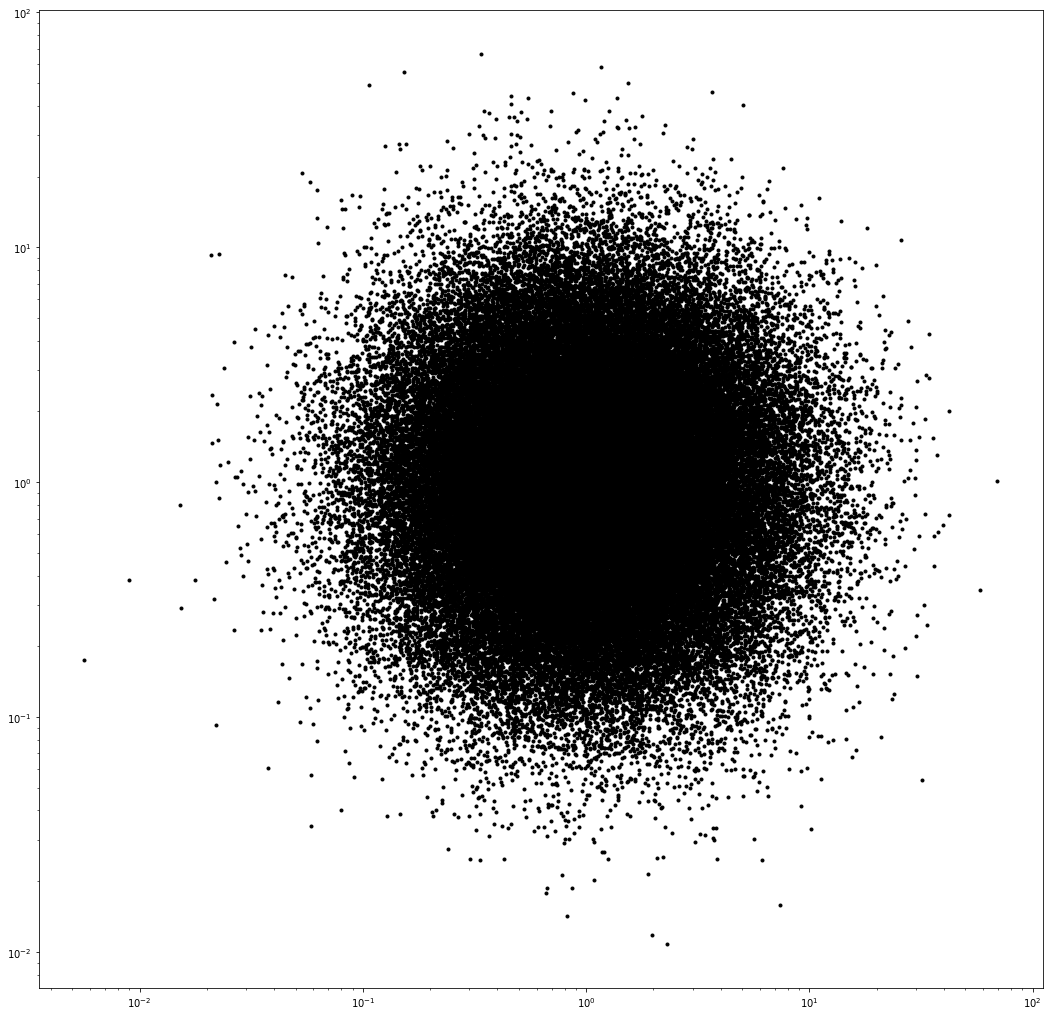

In [41]:
### Create a time series of random variables drawn from a specified distribution
# length of true population time series
total_length = 100000
# create normal distributions
# xf = np.random.normal(0.,1.,size=total_length)
# yf = np.random.normal(0.,1.,size=total_length)
# plt.figure(figsize=[18,18])
# plt.scatter(xf,yf,marker='.',c='b')

# create lognormal distributions
xf = np.random.lognormal(0.,1.,size=total_length)
yf = np.random.lognormal(0.,1.,size=total_length)
plt.figure(figsize=[18,18])
plt.scatter(xf,yf,marker='.',c='k')
plt.xscale('log')
plt.yscale('log')

# create uniform distributions
# xf = np.random.uniform(-1.,1.,size = total_length)
# yf = np.random.uniform(-1.,1.,size = total_length)
# plt.figure(figsize=[18,18])
# plt.scatter(xf,yf,marker='.',c='r')

**Fisher-Z**

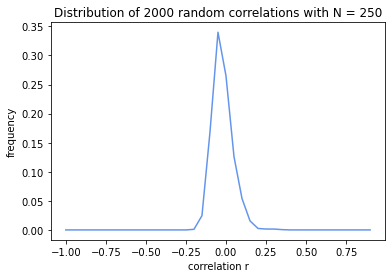

In [65]:
## Generate 2000 realizations of r (correlation) and tr (fisher-Z t-value)
## by sampling from the population time series with sample size = N
N = 250
r = np.empty((2000,)) 
for iloop, val in enumerate(r):
    irandval_x = np.random.randint(low = 0, high = len(xf), size = N)
    irandval_y = np.random.randint(low = 0, high = len(yf), size = N)    
    r[iloop] = stats.pearsonr(xf[irandval_x],yf[irandval_y])[0]
## Plot distribution of correlations
xinc= np.arange(-1.,1.,0.05)
hx = np.histogram(r,xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(r)),'-',color='cornflowerblue')
plt.xlabel('correlation r')
plt.ylabel('frequency')
plt.title('Distribution of 2000 random correlations with N = ' + str(N))
plt.show()
## Calculate the Fisher-Z t-value
tr = (r * np.sqrt(N-2))/(np.sqrt(1-r**2))    ## fisher-Z t-value

Text(0.5, 0, 't value')

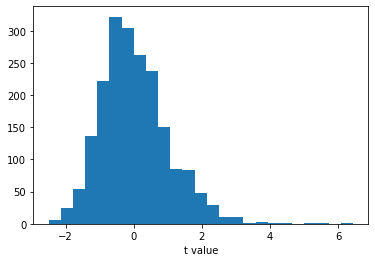

In [68]:
plt.hist(tr, 25);
plt.xlabel('t value')

In [69]:
stats.t.ppf(0.975,N-2)

1.969575653625311

In [72]:
np.shape(j)

(1, 86)

In [55]:
## Assess the frequency of occurrence of statistically significant correlation
## Compare the Fisher-z frequency ("Actual") with the Normal Distribution
## Use 95% confidence interval
j = np.where(tr>=stats.t.ppf(0.975,N-2))
a = np.size(j)/float(np.size(tr))
foo=str(round(a,3)*100.)
print('NormalDist = 2.5%, Actual (using FisherZ) = ' + foo + '%')

NormalDist = 2.5%, Actual (using FisherZ) = 4.3%


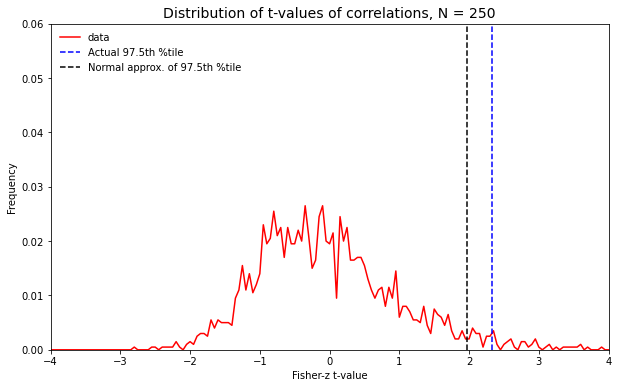

In [56]:
### Plot distribution of t-values of correlations
xinc= np.arange(-5.,5.,0.05)
hx = np.histogram(tr,xinc)

plt.figure(figsize=[10,6])
plt.plot(hx[1][:-1],hx[0]/float(np.size(tr)),'-',color='red', label = 'data')
plt.plot(np.ones((2,1))*np.percentile(tr,97.5),[0.0, 0.1],'--b', label = 'Actual 97.5th %tile')
plt.plot(np.ones((2,1))*stats.t.ppf(0.975,N-2),[0.0, 0.1],'--k', label = 'Normal approx. of 97.5th %tile')
plt.xlabel('Fisher-z t-value')
plt.ylabel('Frequency')
plt.xlim(-4,4)
plt.ylim(0.0,0.06)
plt.title('Distribution of t-values of correlations, N = ' + str(N), fontsize = 14)
plt.legend(loc = 'upper left', frameon = 0, fontsize = 10)
plt.show()